In [2]:
import nltk

from gensim.models import Word2Vec
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import re
from sklearn.manifold import  TSNE

In [97]:
paragraph="""Artificial neural networks (ANNs), usually simply called neural networks (NNs), are computing systems vaguely inspired by the biological neural networks that constitute animal brains.[1]

An ANN is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain. Each connection, like the synapses in a biological brain, can transmit a signal to other neurons. An artificial neuron that receives a signal then processes it and can signal neurons connected to it. The "signal" at a connection is a real number, and the output of each neuron is computed by some non-linear function of the sum of its inputs. The connections are called edges. Neurons and edges typically have a weight that adjusts as learning proceeds. The weight increases or decreases the strength of the signal at a connection. Neurons may have a threshold such that a signal is sent only if the aggregate signal crosses that threshold. Typically, neurons are aggregated into layers. Different layers may perform different transformations on their inputs. Signals travel from the first layer (the input layer), to the last layer (the output layer), possibly after traversing the layers multiple times.A fundamental objection is that ANNs do not sufficiently reflect neuronal function. Backpropagation is a critical step, although no such mechanism exists in biological neural networks.[122] How information is coded by real neurons is not known. Sensor neurons fire action potentials more frequently with sensor activation and muscle cells pull more strongly when their associated motor neurons receive action potentials more frequently.[123] Other than the case of relaying information from a sensor neuron to a motor neuron, almost nothing of the principles of how information is handled by biological neural networks is known.

A central claim of ANNs is that they embody new and powerful general principles for processing information. Unfortunately, these principles are ill-defined. It is often claimed that they are emergent from the network itself. This allows simple statistical association (the basic function of artificial neural networks) to be described as learning or recognition. Alexander Dewdney commented that, as a result, artificial neural networks have a "something-for-nothing quality, one that imparts a peculiar aura of laziness and a distinct lack of curiosity about just how good these computing systems are. No human hand (or mind) intervenes; solutions are found as if by magic; and no one, it seems, has learned anything".[124] One response to Dewdney is that neural networks handle many complex and diverse tasks, ranging from autonomously flying aircraft[125] to detecting credit card fraud to mastering the game of Go.

Technology writer Roger Bridgman commented.
Learning is the adaptation of the network to better handle a task by considering sample observations. Learning involves adjusting the weights (and optional thresholds) of the network to improve the accuracy of the result. This is done by minimizing the observed errors. Learning is complete when examining additional observations does not usefully reduce the error rate. Even after learning, the error rate typically does not reach 0. If after learning, the error rate is too high, the network typically must be redesigned. Practically this is done by defining a cost function that is evaluated periodically during learning. As long as its output continues to decline, learning continues. The cost is frequently defined as a statistic whose value can only be approximated. The outputs are actually numbers, so when the error is low, the difference between the output (almost certainly a cat) and the correct answer (cat) is small. Learning attempts to reduce the total of the differences across the observations.[37] Most learning models can be viewed as a straightforward application of optimization theory and statistical estimation.
ANNs began as an attempt to exploit the architecture of the human brain to perform tasks that conventional algorithms had little success with. They soon reoriented towards improving empirical results, mostly abandoning attempts to remain true to their biological precursors. Neurons are connected to each other in various patterns, to allow the output of some neurons to become the input of others. The network forms a directed, weighted graph.[37]

Data science is an interdisciplinary field focused on extracting knowledge from data sets, which are typically large (see big data).[6] The field encompasses analysis, preparing data for analysis, and presenting findings to inform high-level decisions in an organization. As such, it incorporates skills from computer science, mathematics, statistics, information visualization, graphic design, complex systems, communication, buzzword bingo and business.[7][8] Statistician Nathan Yau, drawing on Ben Fry, also links data science to human-computer interaction: users should be able to intuitively control and explore data.[9][10] In 2015, the American Statistical Association identified database management, statistics and machine learning, and distributed and parallel systems as the three emerging foundational professional communities. Each neuron is a node which is connected to other nodes via links that correspond to biological axon-synapse-dendrite connections. Each link has a weight, which determines the strength of one node's influence on another.[38]

Neural networks learn (or are trained) by processing examples, each of which contains a known "input" and "result," forming probability-weighted associations between the two, which are stored within the data structure of the net itself. The training of a neural network from a given example is usually conducted by determining the difference between the processed output of the network (often a prediction) and a target output. This is the error. The network then adjusts its weighted associations according to a learning rule and using this error value. Successive adjustments will cause the neural network to produce output which is increasingly similar to the target output. After a sufficient number of these adjustments the training can be terminated based upon certain criteria. This is known as [[supervised learning]].

Such systems "learn" to perform tasks by considering examples, generally without being programmed with task-specific rules. For example, in image recognition, they might learn to identify images that contain cats by analyzing example images that have been manually labeled as "cat" or "no cat" and using the results to identify cats in other images. They do this without any prior knowledge of cats, for example, that they have fur, tails, whiskers and cat-like faces. Instead, they automatically generate identifying characteristics from the examples that they process.

History."""

In [98]:
# Preprocessing the data  (for more details on regular expression visit https://regexr.com/)
text = re.sub(r'\[[0-9]*\]',' ',paragraph)
text = re.sub(r'\s+',' ',text)

text = text.lower()

text = re.sub(r'\d',' ',text)
text = re.sub(r'\s+',' ',text)

In [99]:
word = nltk.sent_tokenize(text)
word

['artificial neural networks (anns), usually simply called neural networks (nns), are computing systems vaguely inspired by the biological neural networks that constitute animal brains.',
 'an ann is based on a collection of connected units or nodes called artificial neurons, which loosely model the neurons in a biological brain.',
 'each connection, like the synapses in a biological brain, can transmit a signal to other neurons.',
 'an artificial neuron that receives a signal then processes it and can signal neurons connected to it.',
 'the "signal" at a connection is a real number, and the output of each neuron is computed by some non-linear function of the sum of its inputs.',
 'the connections are called edges.',
 'neurons and edges typically have a weight that adjusts as learning proceeds.',
 'the weight increases or decreases the strength of the signal at a connection.',
 'neurons may have a threshold such that a signal is sent only if the aggregate signal crosses that threshold.

In [100]:
word1 = [nltk.word_tokenize(word) for word in word]

In [101]:
for i in range(len(word1)):
    word1[i] = [word for word in word1[i]
                    if word not in stopwords.words('english')]

In [102]:
word1

[['artificial',
  'neural',
  'networks',
  '(',
  'anns',
  ')',
  ',',
  'usually',
  'simply',
  'called',
  'neural',
  'networks',
  '(',
  'nns',
  ')',
  ',',
  'computing',
  'systems',
  'vaguely',
  'inspired',
  'biological',
  'neural',
  'networks',
  'constitute',
  'animal',
  'brains',
  '.'],
 ['ann',
  'based',
  'collection',
  'connected',
  'units',
  'nodes',
  'called',
  'artificial',
  'neurons',
  ',',
  'loosely',
  'model',
  'neurons',
  'biological',
  'brain',
  '.'],
 ['connection',
  ',',
  'like',
  'synapses',
  'biological',
  'brain',
  ',',
  'transmit',
  'signal',
  'neurons',
  '.'],
 ['artificial',
  'neuron',
  'receives',
  'signal',
  'processes',
  'signal',
  'neurons',
  'connected',
  '.'],
 ['``',
  'signal',
  "''",
  'connection',
  'real',
  'number',
  ',',
  'output',
  'neuron',
  'computed',
  'non-linear',
  'function',
  'sum',
  'inputs',
  '.'],
 ['connections', 'called', 'edges', '.'],
 ['neurons',
  'edges',
  'typically',


In [103]:
model = Word2Vec(word1, min_count=1)


words = model.wv.vocab

# Similar words


In [104]:
similar = model.wv.most_similar('network',topn=20)

similar

[('action', 0.33701497316360474),
 ('often', 0.3056994676589966),
 ('users', 0.29758957028388977),
 ('become', 0.2965957820415497),
 ('response', 0.24450919032096863),
 ('claim', 0.2346080094575882),
 ('usually', 0.23394303023815155),
 ('allow', 0.21591566503047943),
 ('presenting', 0.2132839858531952),
 ('knowledge', 0.2099526822566986),
 ('instead', 0.19428512454032898),
 ('accuracy', 0.1932557374238968),
 ('mechanism', 0.1928408443927765),
 ('see', 0.19186432659626007),
 ('connection', 0.18776170909404755),
 ('labeled', 0.1872103214263916),
 ('small', 0.18410536646842957),
 ('target', 0.1784665435552597),
 ('ranging', 0.17796571552753448),
 ('patterns', 0.17723189294338226)]

In [120]:
# You can also check words similarity and compare above
model.wv.similarity(w1='computing',w2='information')

0.016505172

In [121]:
from sklearn.manifold import  TSNE
vocab = ['artificial','ann','layers','networks','neurons','analysis','data','big','weight','sensor','biological','signal','anns','machine','statistics','response','non-linear','powerful','layers','technology','computing','science','image']
def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=3, n_components=3, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(15,8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points', ha='left')
        plt.savefig('x')

    plt.show()


C:\Users\GT\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


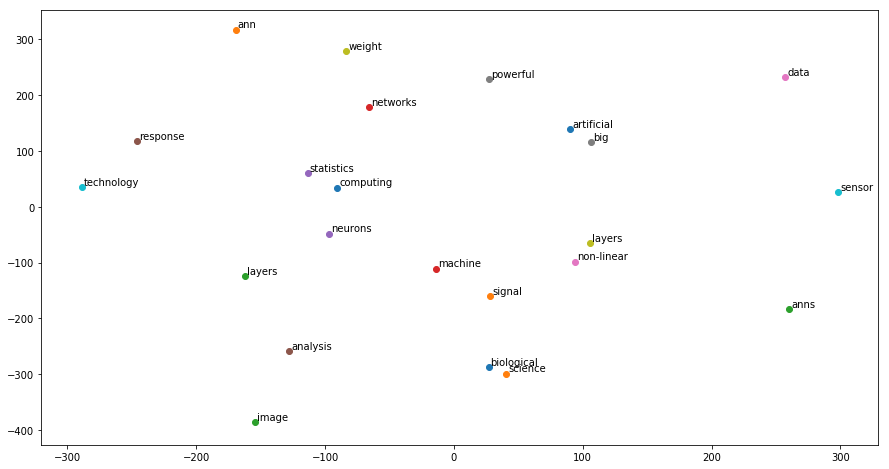

In [122]:

x=tsne_plot(model)